In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:/Downloads/data-export.csv")
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [3]:
df.columns=df.iloc[0]
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
df = df.drop(index=0).reset_index(drop=True)

# Rename columns
df.columns = [
    "Channel Group", "DateHour", "Users", "Sessions", "Engaged Sessions",
    "Average engagement time per Session", "Engaged sessions per user",
    "Events per session", "Engagement rate", "Event count"
]

In [5]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per Session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged Sessions                     3182 non-null   object
 5   Average engagement time per Session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [7]:
df.describe()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per Session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182
unique,7,672,147,180,103,2823,808,2025,986,678
top,Direct,2024042417,1,1,0,0,0,1,0,1
freq,672,6,335,340,393,170,393,133,393,115


In [8]:
df.tail()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per Session,Engaged sessions per user,Events per session,Engagement rate,Event count
3177,Unassigned,2024042806,0,1,0,0,0,2,0,2
3178,Unassigned,2024043005,0,1,0,0,0,2,0,2
3179,Unassigned,2024043006,0,1,0,0,0,2,0,2
3180,Unassigned,2024050105,0,1,0,0,0,2,0,2
3181,Unassigned,2024050307,0,1,0,0,0,2,0,2


In [9]:
df.shape

(3182, 10)

In [10]:
# Convert 'DateHour' to datetime
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors='coerce')

# Identify numeric columns (excluding non-numeric ones)
numeric_cols = df.columns.drop(["Channel Group", "DateHour"])

# Convert to numeric, coercing errors
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Extract the hour from DateHour
df["Hour"] = df["DateHour"].dt.hour


In [11]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per Session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [12]:
numeric_cols=df.columns.drop(["Channel Group","DateHour"])
df[numeric_cols]=df[numeric_cols].apply(pd.to_numeric,errors='coerce')
df["Hour"]=df["DateHour"].dt.hour

In [13]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per Session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average engagement time per Session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [15]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per Session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# What patterns or trends can you observe in website sessions and users over time?

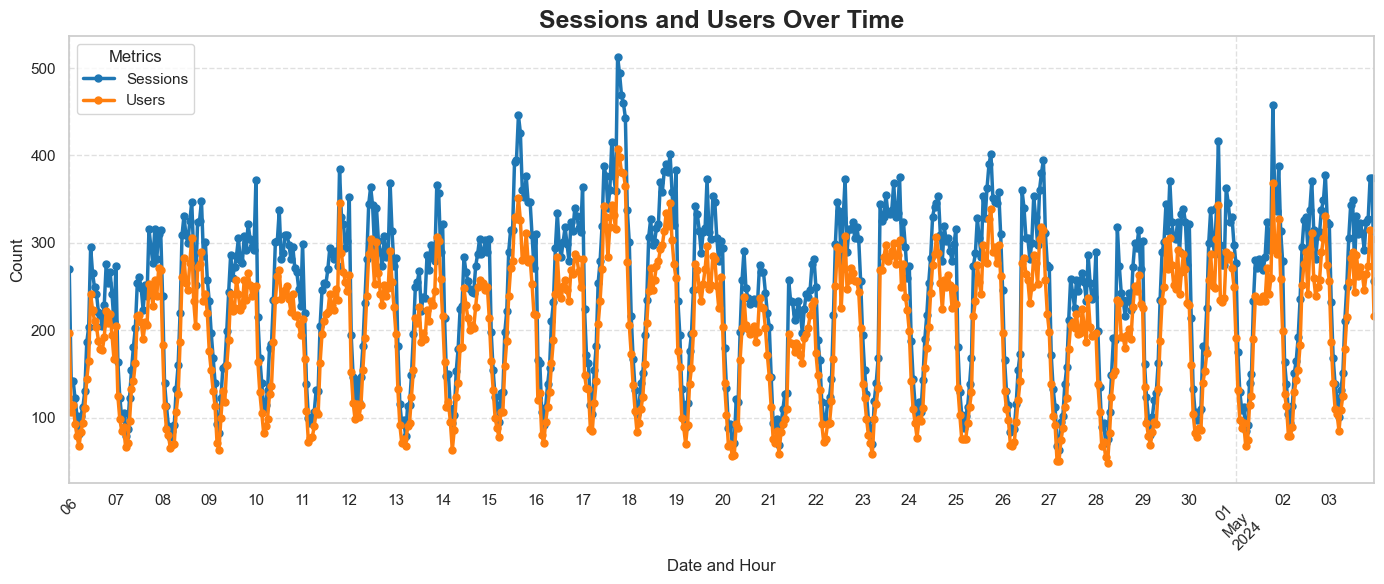

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create a new figure with a wider layout
plt.figure(figsize=(14, 6))

# Plot sessions and users with better styling
df_grouped = df.groupby("DateHour")[["Sessions", "Users"]].sum()
ax = df_grouped.plot(
    ax=plt.gca(),
    linewidth=2.5,
    marker='o',
    markersize=5,
    color=['#1f77b4', '#ff7f0e']  # Blue and orange
)

# Customize title and labels
plt.title("Sessions and Users Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Date and Hour", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid
plt.grid(True, linestyle='--', alpha=0.6)

# Improve legend
plt.legend(title="Metrics", title_fontsize=12, fontsize=11)

# Tight layout to avoid label cutoffs
plt.tight_layout()

# Show the final plot
plt.show()


# Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?

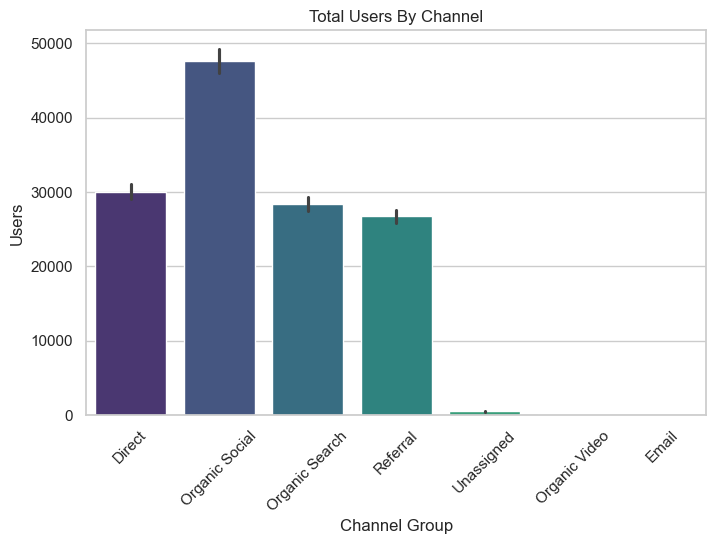

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="Channel Group",
    y="Users",
    hue="Channel Group",       # <- Assign hue
    estimator=np.sum,
    palette="viridis",
    legend=False               # <- Hide legend if not needed
)
plt.title("Total Users By Channel")
plt.xticks(rotation=45)
plt.show()


# Which Channel has the highest average engagement timr, and what does that tell us about user behaviour and content effectiveness?

In [18]:
print(df.columns.tolist())



['Channel Group', 'DateHour', 'Users', 'Sessions', 'Engaged Sessions', 'Average engagement time per Session', 'Engaged sessions per user', 'Events per session', 'Engagement rate', 'Event count', 'Hour']


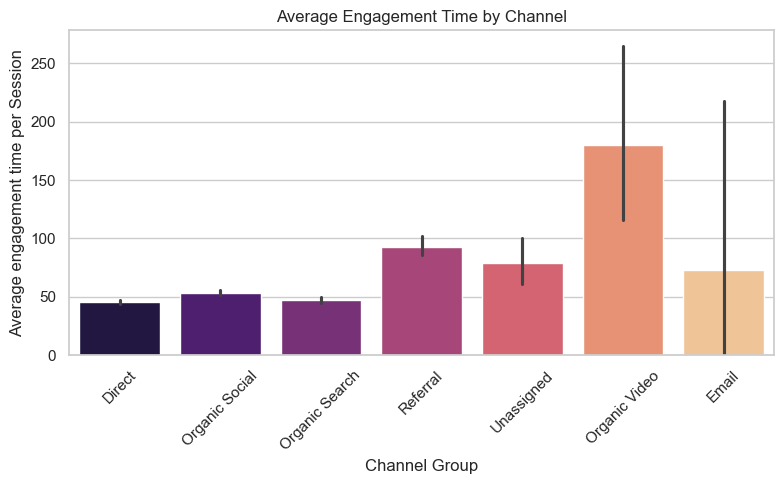

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clean column names just in case
df.columns = df.columns.str.strip()

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Channel Group", y="Average engagement time per Session", 
            hue="Channel Group", estimator=np.mean, palette="magma", legend=False)
plt.title("Average Engagement Time by Channel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# How Does Engagement Rate vary across different traffic channels?

In [21]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per Session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


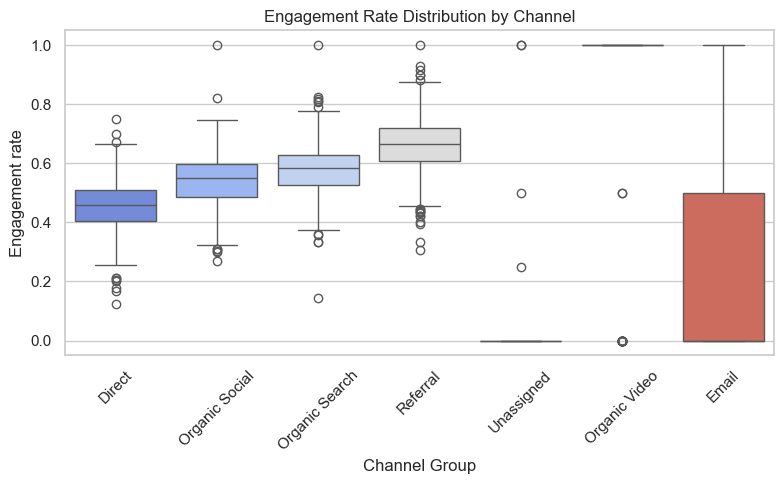

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Channel Group", y="Engagement rate", 
            hue="Channel Group", palette="coolwarm", legend=False)
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Which channels are driving more engaged sessions compared to non-engaged ones,and what strategies can improve engagement in underperforming channels?

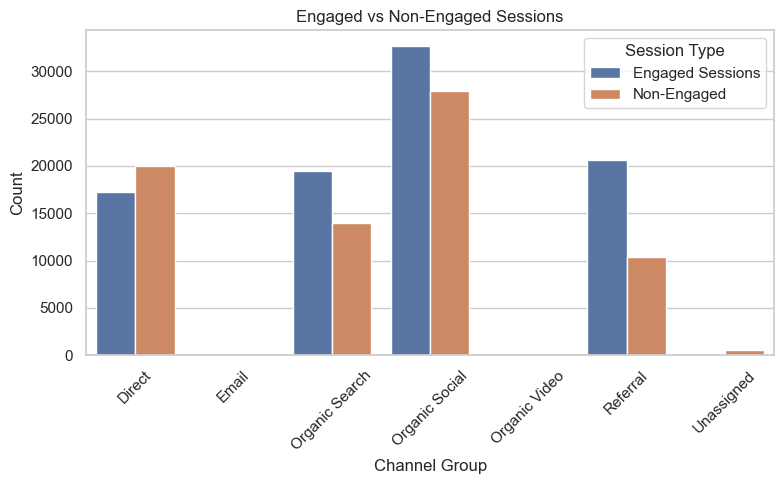

In [25]:
session_df = df.groupby("Channel Group")[["Sessions", "Engaged Sessions"]].sum().reset_index()

# Fixing the bracket issue
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged Sessions"]

# Fixing value_vars syntax
session_df_melted = session_df.melt(
    id_vars="Channel Group",
    value_vars=["Engaged Sessions", "Non-Engaged"],
    var_name="Session Type",
    value_name="Count"
)

plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="Channel Group", y="Count", hue="Session Type")
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# At what hours of the day does each channel drive the most traffic?

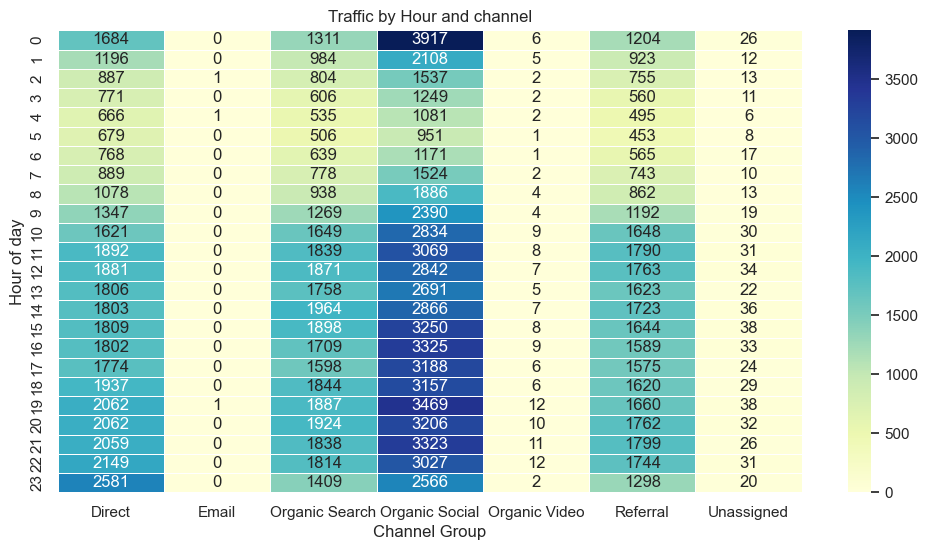

In [26]:
heatmap_data=df.groupby(["Hour","Channel Group"])["Sessions"].sum().unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data,cmap="YlGnBu",linewidths=.5,annot=True,fmt='.0f')
plt.title("Traffic by Hour and channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of day")
plt.show()

# Is there any correlation between high traffic(sessions) and high engagement rate over time?

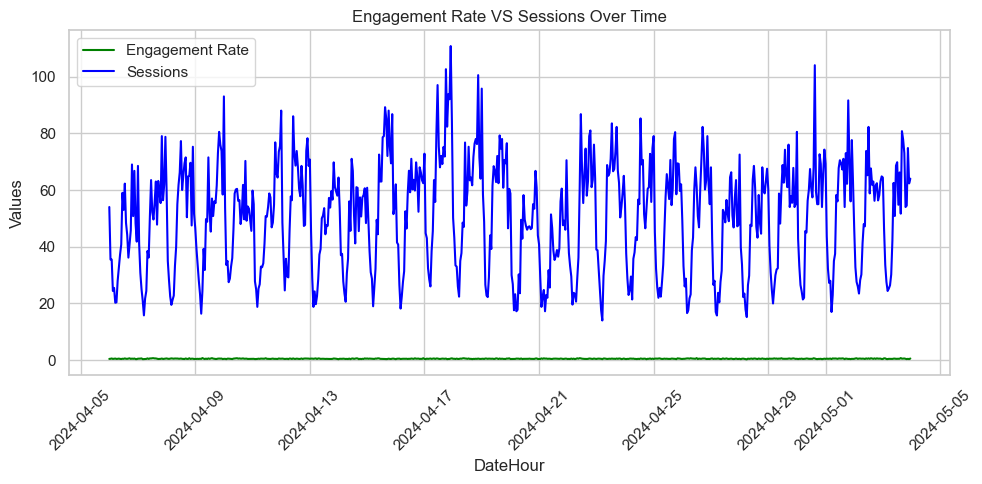

In [30]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement Rate", color="green")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions", color="blue")

plt.title("Engagement Rate VS Sessions Over Time")
plt.xlabel("DateHour")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
